# Go through ALL TODO's!!

# Color Schemes

array([0.1       , 0.18888889, 0.27777778, 0.36666667, 0.45555556,
       0.54444444, 0.63333333, 0.72222222, 0.81111111, 0.9       ])

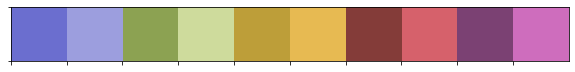

In [82]:
exn_cols = (np.linspace(0.1,0.9,10))
sns.color_palette(plt.cm.tab20b(exn_cols))#.as_hex()


# sns.palplot(['#370042','#600073',"#980070","#c60065","#e92a55","#ff5a40","#ff8827","#ffb600","#ffe300","#fff89c"])

sns.color_palette(['#370042','#600073',"#980070","#c60065","#e92a55","#ff5a40","#ff8827","#ffb600","#ffe300","#fff89c"])
sns.palplot(plt.cm.tab20b(exn_cols))

exn_cols



In [ ]:
np.linspace(0.1,0.9,10)

['#6b6ecf', '#9c9ede', '#8ca252', '#cedb9c', '#bd9e39', '#e7ba52', '#843c39', '#d6616b', '#7b4173', '#ce6dbd']


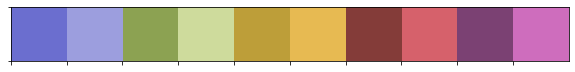

In [85]:
# Set up color Pallette for plotting
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

    
# For plotting:
%matplotlib inline



custom_colors = plt.cm.tab20b(np.linspace(0.1,0.9,10))

# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(custom_colors))
# convert seaborn color schemes to matplotlib colormaps
# color_map = ListedColormap(color_scheme.as_hex()) 
# Show color Pallete
sns.palplot(custom_colors)

red_theme = "#3498db"
blue_theme = "#eba044"

# print("theme_1 color:")
# sns.palplot(red_theme)

# print("theme_2 color:")
# sns.palplot(blue_theme)


ls = sns.color_palette(custom_colors).as_hex()
print(ls)
# https://learnui.design/tools/data-color-picker.html


# Various Plot Types
## Bar
## Box and Whisker
## Scatter Plot
## Histogram
## Alignment Diagram
## Weight Matrix
# Image File Types (vector)


# Gene Diagram

In [309]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib



class GeneImage(object):
    def __init__(self, total_span, exon_intervals, marker_pos=[], marker_colors=[], homology_list=[]):
        '''
        **Required Inputs**
        
        total_span
            type: integer
            * length of the gene to be plotted (number of nucleotides)
                Ex: total_span = 4560 # will draw gene of length 4560 nucleotides
                
                NOTE: all exon intervals must be within position 1 to total_span
                
        exon_intervals
            type: 2D list of integers
            * List of start and end positions (in nucleotides) of exons
                Ex: exon_intervals = [[266, 567],[756, 800]] 
                   # will draw two exons: the first starting at position 266 and ending at position 567, the second starting at 756 and ending at position 800
            
            NOTE: put exon intervals in order (from first to last numerically) in this list to prevent issues with coloring properly
            
        **Optional Inputs**
        
        marker_pos
            type: list of integers
            * positions (in nucleotides) of where to put the marker (arrows) within the exon intervals # TODO: update if fix this
            Ex: marker_positions = [874,956,2290] # will place arrows at positions 874,956, and 2290 in the gene diagram
            
            NOTE: marker positions must be within the exon intervals
        
        marker_colors 
            type: list of Strings (colors)
            * To set all marker colors to a single color:
                Set this value to a list of length 1 containing that color
                
                Ex: marker_colors = ["blue"] # will set all marker colors to blue
                
            * To set some markers to a specific color:
                Create a list of colors that is the same length as your list of marker_pos, change the color of
                the value in the list position that corridnates with the marker position.
                
                Ex: marker_colors = ["grey","grey","red","grey","green","red"], marker_pos = [8744,6059,2290,9679,11594,8201] # all markers but the 3rd and 5th marker will be grey, the 3rd marker will be red, the fifth marker will be blue
        
        homologyList
            type: list of integers
            * list of integer values from 0 to 100 indicating the homology to be used for coloring arrows by homology
                A value of 0 indicates 0% homology at that position
                A value of 100 indicates 100% homology at that position
                
            NOTE: length of homology list must be the same as the length for marker_pos 
            
            
        Method modified from: https://gist.github.com/parashardhapola/e095e3ebd068c90e7089b53e46b8e0bc
        Original Author: Parashar Dhapola
        '''
        
        # sort exon_intervals
        exon_intervals.sort()
        # TODO: make so can put markers in introns
        self.totalSpan = total_span # user input
        self.exonIntervals = exon_intervals # user input
        
        self.markerPositions = marker_pos # optional input
        self.markerColors = marker_colors # optional input 
        self.homologyList = homology_list # optional input
        
        self.exonOverlay = self._find_exon_overlap(self.exonIntervals)
        
        self.markerHeights = []
        self.markerSize = 200
        self.MarkerWeight = 1.5
        self.exonColor = "black"
        self.intronColor = "black"
        self.intronWeight = 0
        self.intronStyle = '-'
        self.barColor= "black"
        self.bgColor = "white"
        self.markerDefaultColor = '#858585'
        self.markerEdgeDefaultColor = "black"
        self.numExons = len(self.exonIntervals)
        self.minExonLen = self.totalSpan*0.005
        self.ylims = {'exon_max': 2, 'exon_min':1}
        self.figure, self.canvas = plt.subplots(figsize=(30,5))
        self.canvas.set_facecolor(self.bgColor)
        self._draw()

    def _set_limits(self):
        self.ylims['intron_max'] = self.ylims['exon_max']*0.25
        self.ylims['intron_min'] = (self.ylims['exon_max'] + self.ylims['exon_min'])/2.0
        self.ylims['bar_min'] = self.ylims['exon_max']-0.6
        self.ylims['bar_max'] = self.ylims['bar_min']+(self.ylims['exon_max']-self.ylims['exon_min'])/5.0
        
    def _find_exon_overlap(self,exon_intervals):
        # takes a SORTED list of exon_intervals and looks for overlapping exons to ensure properly staggered in the diagram
        exon_overlap_ls = [0] # keeps track of overlapping exons, if 0, no overlap, >1 indicates number of overlaps
        exon_overlap_ct = 0
        # start at 2nd exon
        i = 1
        exon_end_pos = exon_intervals[0][-1]
        # [[266, 13483],[100, 21555],[21570,22000]  ]
        while i<len(exon_intervals):
            # look for overlap in the exon with the previous exon
            # overlap if this intron's start position is less than the previous intron's end position
            if (exon_intervals[i][0] < exon_end_pos):
                # exons overlap
                exon_overlap_ct+=1
                # new exon_end_pos will be set if this exon ends past previous
                exon_end_pos = max(exon_end_pos,exon_intervals[i][-1])
            else:
                # no overlap
                exon_overlap_ct = 0 # resets the count (in event it increased from previous exons)
                exon_end_pos = exon_intervals[i][-1]
            exon_overlap_ls.append(exon_overlap_ct)
            i+=1
        # TODO: update exon intervals list to accomodate any overlaps
        # for any overlaps puts largest exon in the back (positions it so largest exon is first)
        
        # TODO: be sure this works for all types of overlap because will be different for different types
#         updated_exon_intervals = []
#         self.exonIntervals = updated_exon_intervals # TODO: uncomment so updates exon intervals
        return exon_overlap_ls
                
    
    def _transform_spans(self):
        span_lens = [x[1]-x[0] for x in self.exonIntervals]
        max_len = float(max(span_lens))
        transformed_intervals = []
        if max_len < self.minExonLen:
            span_ratios = [x/max_len for x in span_lens]
            expansion_factor = self.totalSpan*1e-11
            for i in range(1,10):
                ef = (2**i)*expansion_factor
                if max_len+ef > self.minExonLen:
                    expansion_factor = ef
                    break
            for i,j in zip(self.exonIntervals, span_ratios):
                mid = (i[0] + i[1])/2
                f = (expansion_factor*j)/2
                if mid+f - mid-f > self.minExonLen:
                    transformed_intervals.append([mid-f, mid+f])
                else:
                    transformed_intervals.append([mid-(self.minExonLen/2), mid+(self.minExonLen/2)])
        else:
            for i in range(self.numExons):
                if span_lens[i] < self.minExonLen:
                    mid = (self.exonIntervals[i][0] + self.exonIntervals[i][0])/2 
                    transformed_intervals.append([mid-(self.minExonLen/2), mid+(self.minExonLen/2)])
                else:
                    transformed_intervals.append(self.exonIntervals[i])
        self.exonIntervals = transformed_intervals[:]
        
    def _draw_exon(self, span,col):
        self.canvas.fill_between(span, self.ylims['exon_min']+.2, self.ylims['exon_max']-.2,
                                 edgecolor=self.bgColor, facecolor=col)
        return True
    
    def _draw_staggered_exon(self, span,col):
        self.canvas.fill_between(span, self.ylims['exon_min']-.1+.2, self.ylims['exon_max']-.1-.2,
                                 edgecolor=self.bgColor, facecolor=col)
        return True
        
    def _draw_intron(self, span):
        mid = (span[0]+span[1])/2.0
        self.canvas.plot([span[0], mid], [self.ylims['intron_min'], self.ylims['intron_max']],
                         c=self.intronColor, lw=self.intronWeight, ls=self.intronStyle)
        self.canvas.plot([mid, span[1]], [self.ylims['intron_max'], self.ylims['intron_min']],
                         c=self.intronColor, lw=self.intronWeight, ls=self.intronStyle)
        return True
    
    def _draw_markers(self):
        if self.markerHeights == []:
            self.markerHeights = [self.ylims['exon_max']-self.ylims['exon_min'] for x in self.markerPositions]
#         if self.markerColors == []:
#             self.markerColors = [self.markerDefaultColor for x in self.markerPositions] 
        if self.markerColors == []:
            self.markerColors = [self.markerDefaultColor for x in self.markerPositions]
        if self.homologyList == []:
            cmp1 = matplotlib.colors.LinearSegmentedColormap.from_list("", self.markerColors)
            self.canvas.scatter(self.markerPositions, [x+0.84 for x in self.markerHeights], 
                c = self.markerColors,
                s=self.markerSize, marker='v', cmap=cmp1,
                linewidths=1,edgecolors=self.markerEdgeDefaultColor, alpha=1)
        else:
            # If user inputs a list of homology values then will color arrows by homology with a color gradient, 
            # Create gradient for homology coloring
            norm = matplotlib.colors.Normalize(-1,1)
            grad_colrs = [[norm(-1.0), "white"],[norm( 1.0), "#00bfc9"]]
            cmp1 = matplotlib.colors.LinearSegmentedColormap.from_list("", grad_colrs)
            # NOTE: 0.84 was an arbitrary number selected to ensure arrow labels show up at correct point on Exon bars
            self.canvas.scatter(self.markerPositions, [x+0.84 for x in self.markerHeights], 
                    # TODO: changet this to an input value rather than something we put here!
                    # homology list
                    c = self.homologyList,
                    s=self.markerSize, marker='v', cmap=cmp1,
                    linewidths=1,edgecolors=self.markerEdgeDefaultColor, alpha=1)
    
    def _clean_axes(self):
        #self.canvas.set_ylim((self.ylims['exon_min'], self.ylims['bar_max']))
        self.canvas.set_yticks([], [])
        self.canvas.get_xaxis().tick_top()
        self.canvas.tick_params(axis='x', direction='out')
        self.canvas.set_xticks([])
        for o in ["top", "bottom", "left", "right"]:
            self.canvas.spines[o].set_visible(False)
        min_pos = 0#int(self.exonIntervals[0][0] - self.totalSpan * 0.1)
        if min_pos < 0:
            min_pos = 0
        max_pos = self.totalSpan#int(self.exonIntervals[-1][1] + self.totalSpan * 0.1)
        # TODO: why is the below value divided by 20? is it because of the gradient? is it specific to the gene?
        minortick_pos = [int(x) for x in range(0, self.totalSpan, int((0-self.totalSpan)/20))][1:]
        
    def _draw(self):
        self._set_limits()
        self._transform_spans()
        
        # exon colors
        exn_cols = ['#6b6ecf', '#9c9ede', '#8ca252', '#cedb9c', '#bd9e39', '#e7ba52', '#843c39', '#d6616b', '#7b4173', '#ce6dbd']
#         exn_cols = ['#370042','#600073',"#980070","#c60065","#e92a55","#ff5a40","#ff8827","#ffb600","#ffe300","#fff89c"]
#         exn_cols = plt.cm.tab20b(np.linspace(0.1,0.9,10))

        self.canvas.fill_between([0,self.totalSpan ],
                                  self.ylims['bar_min'], self.ylims['bar_max'],
                                  edgecolor=self.bgColor, facecolor=self.barColor)

    
        for i in range(self.numExons):
            # draw introns
            if i > 0: 
                self._draw_intron([self.exonIntervals[i-1][1], self.exonIntervals[i][0]])
            # draw exons
            # check if exons overlap for this interval
            if self.exonOverlay[i] > 0:
                print(i)
                print(self.exonOverlay)
                # TODO: make so this works for all cases (when i increases too)
                self._draw_staggered_exon(self.exonIntervals[i],exn_cols[i])
            else:
                self._draw_exon(self.exonIntervals[i],exn_cols[i])
        
        self._draw_markers()
        self._clean_axes()
    
    def show(self):
        plt.show()
        
    def save(self,file_name):
        plt.savefig(file_name+".eps", format='eps',transparent=True)
        print("File saved to: ",file_name+".eps" )
        

# TODO: move arrows because with overlaps will have gaps, also want to work with introns
# TODO: output a bar with homology values?
# TODO: make so can input colors (be sure it checks have enough colors if not maybe have it warn or pick defaults?)
# TODO: allow input to color arrows but also input if don't want to color them! - possibly make 2 tonal colors possible?
# TODO: for colors show how to make 2 or 3-tonal just using python code (filling in number values)?
# TODO: have a more "Advanced" section? with additional options?
# TODO: try different gene maps
# TODO: we had other figures we made for gene maps (at bottom of other file)
# TODO: determine how to show overlaps in cases other than SAR-COV2 genome
# TODO: check that have enough colors for large genes, auto-create gradient/color scheme otherwise


In [314]:
21563-23384

-3821

1
[0, 1, 0, 0, 0, 0, 0, 0, 0]


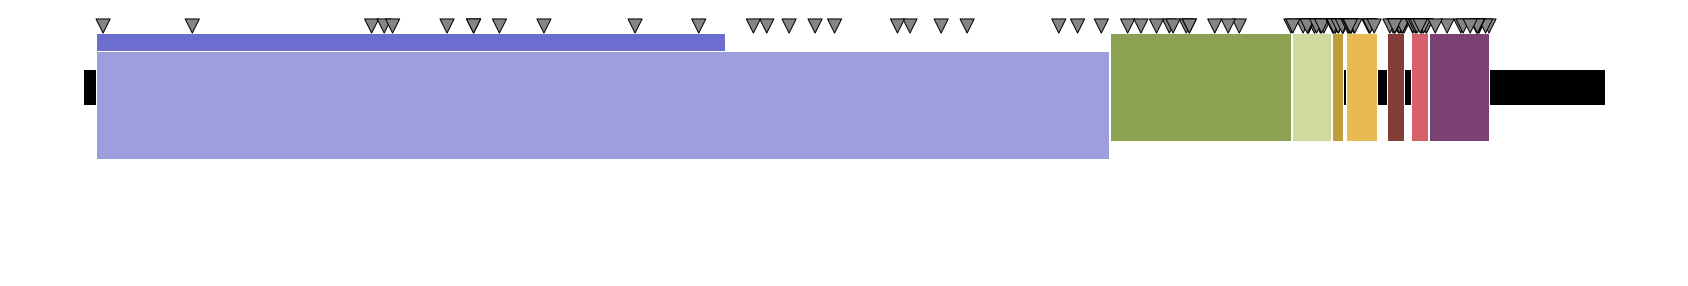

In [318]:
# exon positions
exon_pos=[[266, 21555],[266, 13483], [21563, 25384], [25393, 26220], [26245, 26472], [26523, 27191], [27394, 27759], [27894, 28259], [28274, 29533]]

# Patient isolate homology:
# homology_list =  [20, 18, 17, 20, 12, 11, 23, 37, 13, 26, 14, 11, 23, 12, 13, 24, 12, 16, 13, 49, 14, 15, 9, 15, 13, 18, 17, 20, 16, 77, 16, 21, 16, 7, 14, 15, 17, 31, 30, 31, 17, 32, 31, 31, 13, 34, 36, 18, 8, 11, 9, 8, 8, 14, 24, 7, 13, 9, 14, 12, 13, 36, 100, 13, 18, 13, 15, 94, 14, 13, 41, 14, 48, 41, 47, 46, 46, 43, 36, 41, 6, 43, 43, 40, 16, 21, 21, 13, 21, 169, 20, 13, 22, 169, 17, 19, 14, 11, 14, 20, 19, 31, 12, 21, 17, 6, 21, 25]

# CoV family homology:
# homology_list = [3,3,4,3,16,64,42,35,59,14,4,64,78,5,42,4,38,68,58,19,43,67,68,69,24,6,60,70,40,7,17,25,8,5,66,54,9,63,10,9,38,47,49,10,28,15,34,9,12,11,12,24,64,100,34,13,63,63,49,51,47,77,64,66,51,50,31,9,55,15,11,10,34,10,34,12,11,56,37,21,11,53,84,14,13,12,87,10,15,10,12,9,9,12,13,22,42,67,10,10,29,30,5,4,13,15,22,0
# NOTE: NEED TO UPDATE c IN CODE ABOVE TO CHANGE HOMOLOGY COLORS IN ARROWS!!

# marker positions
marker_positions = [29537, 8744,6059,2290,9679,11594,8201,6322,416,12932,6499,7643,8200,21391,14361,15376,17370,18571,14830,17107,20497,15786,18025,14080,20892,25375,23174,24289,21944,22820,22898,23239,22223,23240,24056,22550,23774,25992,25734,25870,25868,26066,25630,25745,25736,25413,25717,25914,26018,26463,26374,26467,26261,26258,26470,26313,26269,26305,26277,26369,26455,26581,27014,27032,26638,26573,26637,26602,27035,26693,26717,27123,26624,27751,27537,27522,27705,27671,27633,27656,27565,27455,27720,27715,27553,28119,27932,27940,28218,28002,28128,27986,28222,28024,28127,28163,28091,29328,29307,28945,28655,29276,29464,28992,29293,29303,28407,29292,29141]
gene_length = 31976
homology_values = [3,3,4,3,16,64,42,35,59,14,4,64,78,5,42,4,38,68,58,19,43,67,68,69,24,6,60,70,40,7,17,25,8,5,66,54,9,63,10,9,38,47,49,10,28,15,34,9,12,11,12,24,64,100,34,13,63,63,49,51,47,77,64,66,51,50,31,9,55,15,11,10,34,10,34,12,11,56,37,21,11,53,84,14,13,12,87,10,15,10,12,9,9,12,13,22,42,67,10,10,29,30,5,4,13,15,22,0]

gene = GeneImage(total_span=gene_length, 
                 exon_intervals=exon_pos, 
                 marker_pos=marker_positions,
#                  marker_colors=["pink","red","pink"],
                 #,homology_list = homology_values)
                )
# gene.show()
# save
# gene.save("covid_genome_arrows_colored_by_genome_presence")
# gene.save("covid_genome_arrows_colored_by_genome_presence_CoV_family")


In [256]:
# Homology List
# list from 0 to 100 with 100 being highest homology 0 being no homology
# TODO: make a script to output this!

In [149]:
norm = matplotlib.colors.Normalize(-1,1)
grad_colrs = [[norm(-1.0), "white"],[norm( 1.0), "#00bfc9"]]
cmp1 = matplotlib.colors.LinearSegmentedColormap.from_list("", grad_colrs)

In [213]:
matplotlib.colors.LinearSegmentedColormap.from_list("", ["pink"])

In [249]:
exon_pos = exon_pos.sort()

In [302]:
exon_pos =[[266, 13483],[266, 21555], [21563, 25384], [25393, 26220], [26245, 26472], [26523, 27191], [27394, 27759], [27894, 28259], [28274, 29533]]


In [303]:
len(exon_pos)

9